Input Samples:
 [[1.11 4.35 1.03 4.59 2.44 3.06 3.83 2.59 1.48 0.94 0.4  3.69 2.21 0.79
  4.4  1.37 2.07 1.48 3.14 2.9  3.   1.33 1.42 1.27 1.64 0.72 0.83 4.82
  4.8  0.94 0.12 1.02 3.5  3.9  0.11 2.89 0.01 2.58 3.2  4.93 1.3  4.01
  4.35 4.61 0.01 2.35 4.91 1.99 4.07 2.73 3.85 2.42 0.15 0.43 0.56 1.26
  4.82 3.16 4.08 2.83 3.18 4.06 4.63 4.56 4.12 0.47 1.81 0.18 2.73 3.98
  0.26 0.94 1.83 1.22 3.98 1.76 3.19 2.47 2.92 4.7  4.72 0.56 4.22 1.73
  0.5  1.92 2.55 4.81 1.86 0.06 4.3  0.56 2.39 4.25 2.57 2.23 4.   0.1
  2.86 2.06]]
Output Labels:
 [[0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1
  0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0
  0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0]]
Loss at 0 th epoch = [[-1.35596533]]
Loss at 100 th epoch = [[-0.0511607]]
Loss at 200 th epoch = [[-0.04200408]]
Loss at 300 th epoch = [[-0.03717173]]
Loss at 400 th epoch = [[-0.03405944]]
Loss at 500 th epoch = [[-0.03183982]]
Loss at 600 

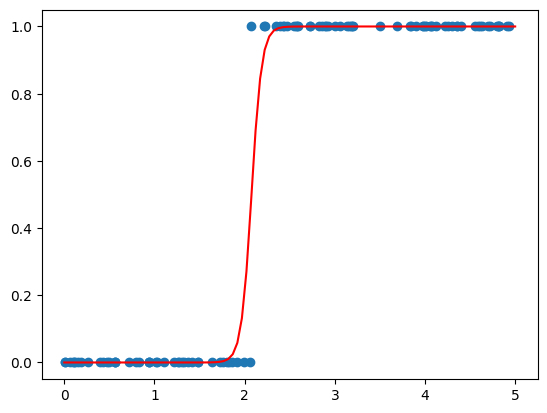

In [18]:
#Logistic Regression using single and multiple variables
##Loss function for Logistic Regression = cross entropy = y*log(a)+(1-y)*log(1-a)
import numpy as np
import random
import matplotlib.pyplot as plt
##Class to implement Logistic Regression
class LogisticRegression:
    def __init__(self,samples,features,learning_rate,epochs,noise):
        self.X_samples = samples              # Number of Samples = self.X_samples
        self.X_features = features            # Number of features = self.X_features
        self.learning_rate = learning_rate    # Learning Rate = self.learning_rate
        self.epochs = epochs                  # Iterations = self.epochs
        self.noise = noise                    # Influence of noise = self.noise 
     
    def XSamples(self,Xshow=0):               # Set show == 1 to display the input Samples
        ##Create a random Data sample for X using the number of samples and the number of features 
        X_train = np.round(np.random.uniform(0,5,(self.X_samples,self.X_features)),2) ## The values of samples range from 0-1 and and rounded off to 2 decimal places
        if Xshow==1:
            print('Input Samples:\n',X_train.T)
        return X_train
    
    def ySamples(self,X,yshow=0):                                               ## Set show == 1 to display the output labels for the samples
        ## Create the output samples for the input samples.
        ## Obtaining a random classification for Inputs
        temp = np.zeros(X.shape)
        for i in range(self.X_features):
            temp[:,i] = random.uniform(0,3)*X[:,i]                              ## 1. Multiply each column of samples by an random variable
        y = np.array([np.sum(temp,axis=1)]).T+np.array(random.randint(1,10))    ## 2. Add all the columns after multiplying and add a random bias
        y = y/5+self.noise*np.random.random((y.shape))                          ## Shape the outputs to lie in a certain range by dividing by 5 and add noise
        y = np.where(y<2,0,1)                                                   ## classify the outputs: where y<2, label = 0 else label = 1
        if yshow==1:
            print('Output Labels:\n',y.T)
        return y
    
    def randomWeightsandBias(self,X):
        ##Initialize the weights and bias to any random values between -1 to 1
        w = np.random.uniform(-1,1,(1,X.shape[1]))
        b = np.random.uniform(-1,1,(1,1))
        return (w,b)

    def forwardPropagation(self,X,w,b):
        ## Calcluate the value of linear regression variable for training
        ## z = Xw+b - Equation of the regression variable
        ## Calculating the activation function values
        ## a = 1/(1+e^(-z)) - Activation function variable
        z = np.dot(X,w.T)+b
        a = 1/(1+np.exp(-z))
        return a
    
    def derivative(self,y,a):
        ##Find the derivatives for back propagation
        ## dL = dL/da
        ## dL/dw = (dL/da)*(da/dw)
        ## dL/db = (dL/da)*(da/db)
        da = (y-a)/self.X_samples
        return da
    
    def backwardPropagation(self,da,X):
        ##Back propagation to get dw = dJ/dw and db = dJ/db
        dw = np.dot(da.T,X)
        db = np.sum(da)
        return (dw,db)

    def displayGraph(self,w,b,X,y):
        ## Function to plot the graph if only one feature
        X_axis = np.linspace(0,5,100).reshape(100,1)
        z = (np.dot(w,X_axis.T)+b).T
        a = 1/(1+np.exp(-z))
        plt.scatter(np.ravel(X),y)
        plt.plot(X_axis,a,color='red')

    ##Train the model
    def train_model(self,Xshow=0,yshow=0,show_loss=0,seed=0,epsilon=1e-5): ##Pass the show values to show the losses,inputs,output labels and weights and seed
        np.random.seed(seed)
        random.seed(seed)
        X = self.XSamples(Xshow)                                           ## Get the input values
        y = self.ySamples(X,yshow)                                         ## Get output values corresponding to input for logistic regression
        (w,b) = self.randomWeightsandBias(X)                               ## Get the random weights and bias values
        ##Training the model over epochs number of iterations
        for i in range(self.epochs):
            a = self.forwardPropagation(X,w,b)                             ## Calculate thw regression variable after each iterations
            if i%100 == 0 and show_loss==1:                                ##Set show_loss == 1 to display the loss after certain iterations
                loss = (np.dot(y.T,np.log(a+epsilon))+np.dot((1-y).T,np.log(1-a+epsilon)))/len(X)
                print('Loss at',i,'th epoch =',loss)                       ## Print the loss values after 100 iterations
            da = self.derivative(y,a)                                      ## Derivatives for back propagations
            (dw,db) = self.backwardPropagation(da,X)                       ## Get dw and db
            w = w+self.learning_rate*dw                                    ## Update weights after each iteration
            b = b+self.learning_rate*db                                    ## Update bias after each iteration
        print(w,b)                                                         ## Print final weights and bias values
        if self.X_features==1:
            self.displayGraph(w,b,X,y) 

##Instantiate the object
logr = LogisticRegression(samples=100,features=1,
                      learning_rate=8,
                      epochs=5000,noise=0.05)
logr.train_model(Xshow=1,yshow=1,
                 show_loss=1,seed=5,
                 epsilon=1e-5)
##########Important Note##########
## Here a constant is used epsilon
## Reason: When calcluating the loss, when epsilon=0, a stage may be reached where the loss == nan
## This occurs when a = 1, hence log(0) becomes undefined
## Inorder to prevent this use a random value epsilon which is a very small value to prevent the above error